# Random Forest Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
DATA_PATH = 'data/'
X_train = pd.read_csv(f'{DATA_PATH}x_train.csv',sep='\t', index_col='index')
X_test = pd.read_csv(f'{DATA_PATH}x_test.csv', sep='\t', index_col='index')
y_train = pd.read_csv(f'{DATA_PATH}y_train.csv',sep='\t', index_col='index')
y_test = pd.read_csv(f'{DATA_PATH}y_test.csv',sep='\t', index_col='index')

In [3]:
rfr = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
clf = GridSearchCV(rfr, param_grid, scoring= 'r2', cv = 5, verbose = 3, n_jobs= 2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  8.3min
[Parallel(n_jobs=2)]: Done 375 out of 375 | elapsed: 11.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=3)

In [6]:
pred = clf.predict(X_test)
r2_score(y_test, pred)

0.6740423871858386

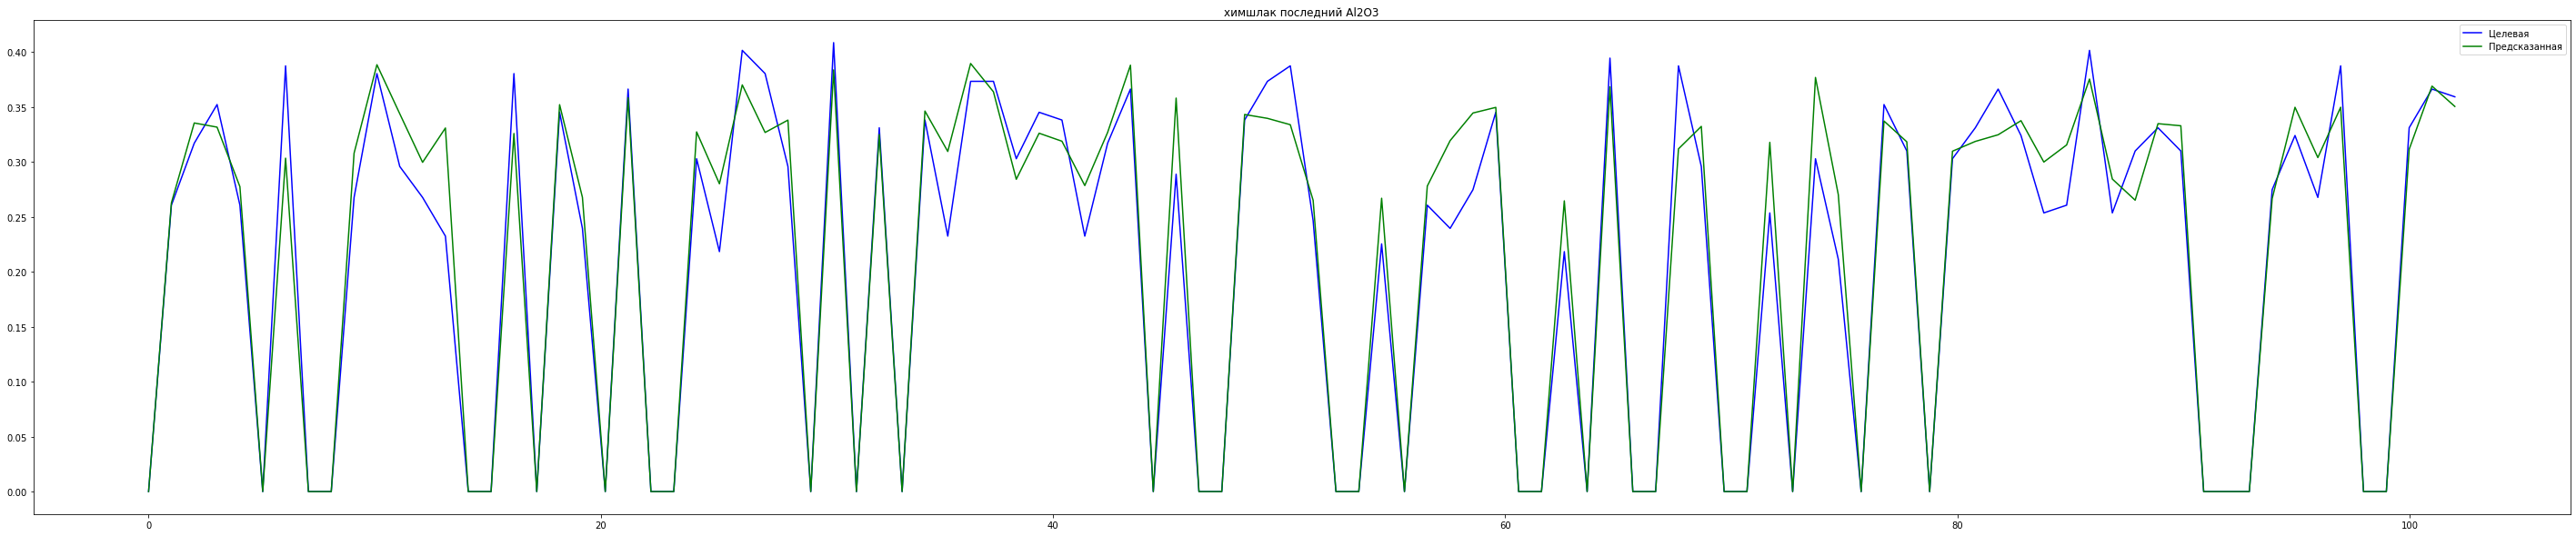

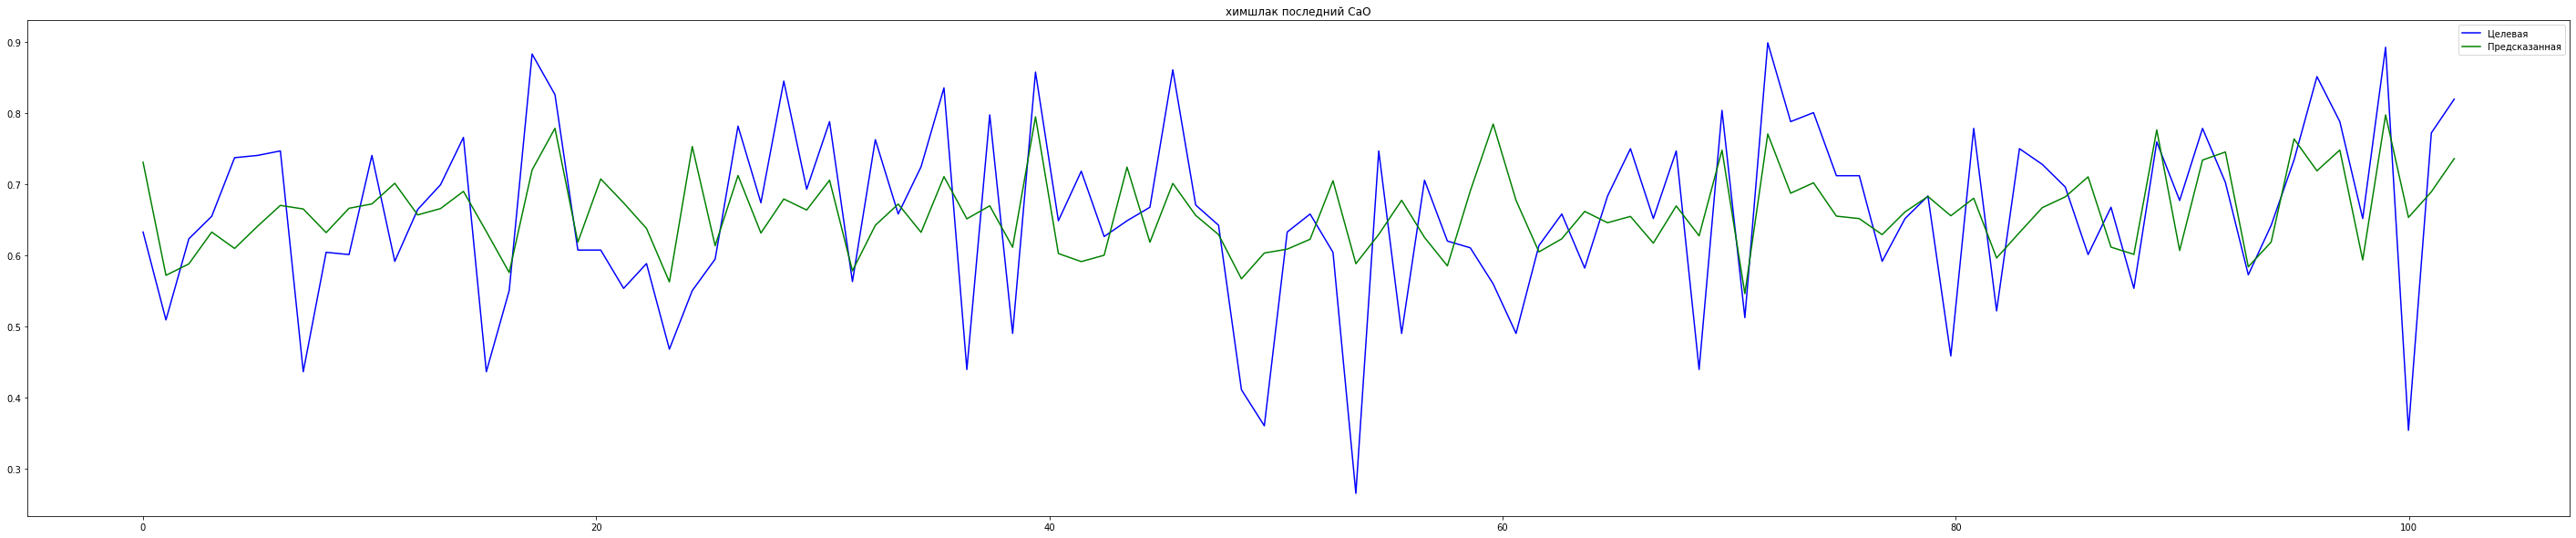

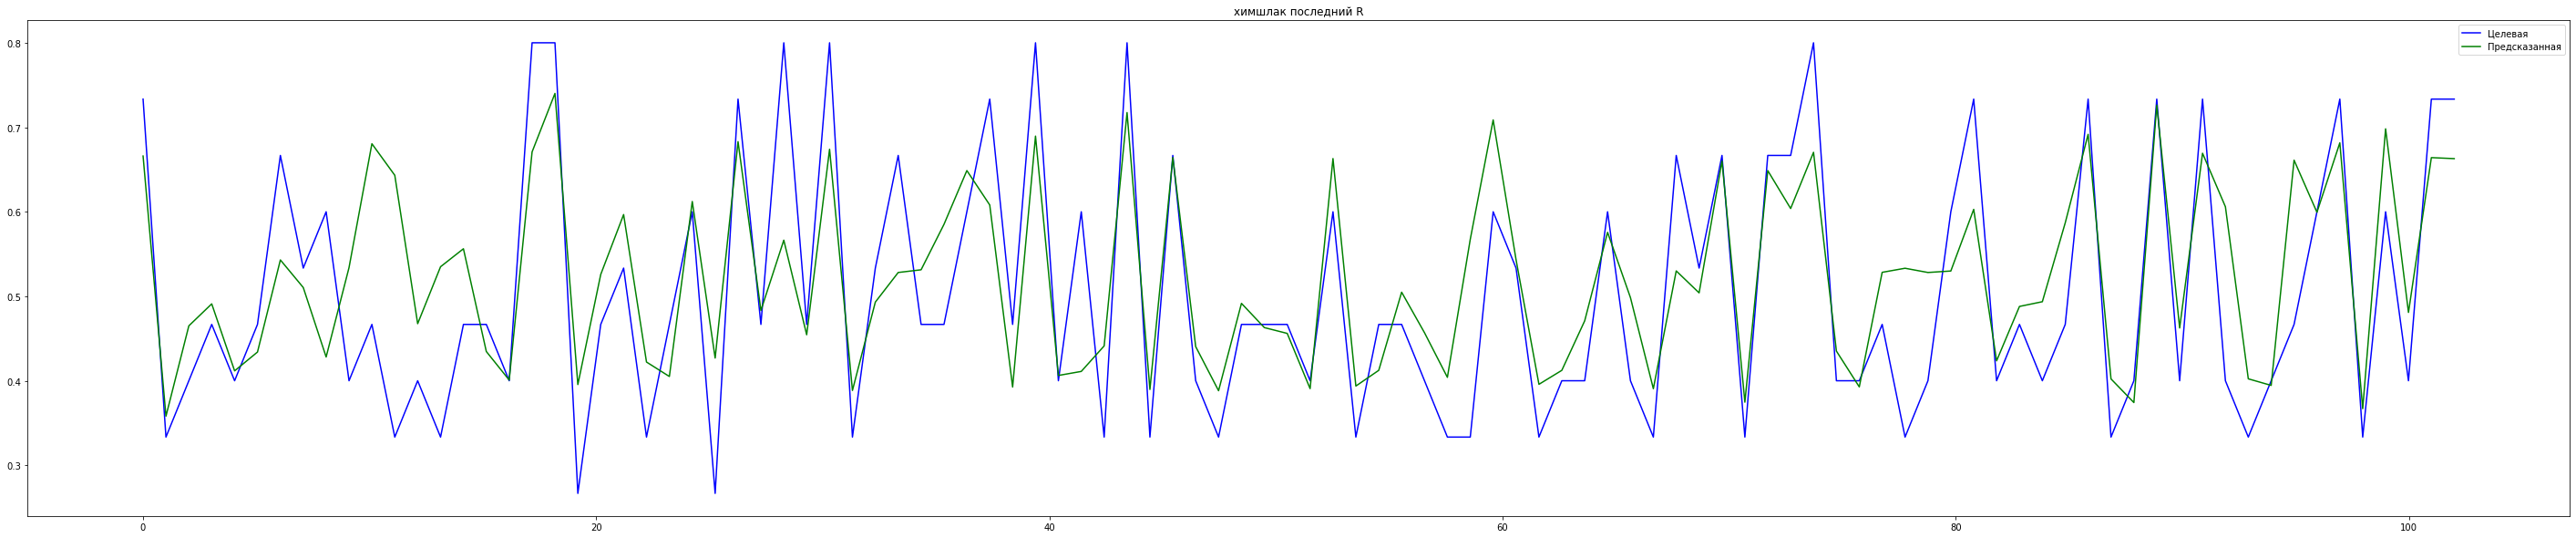

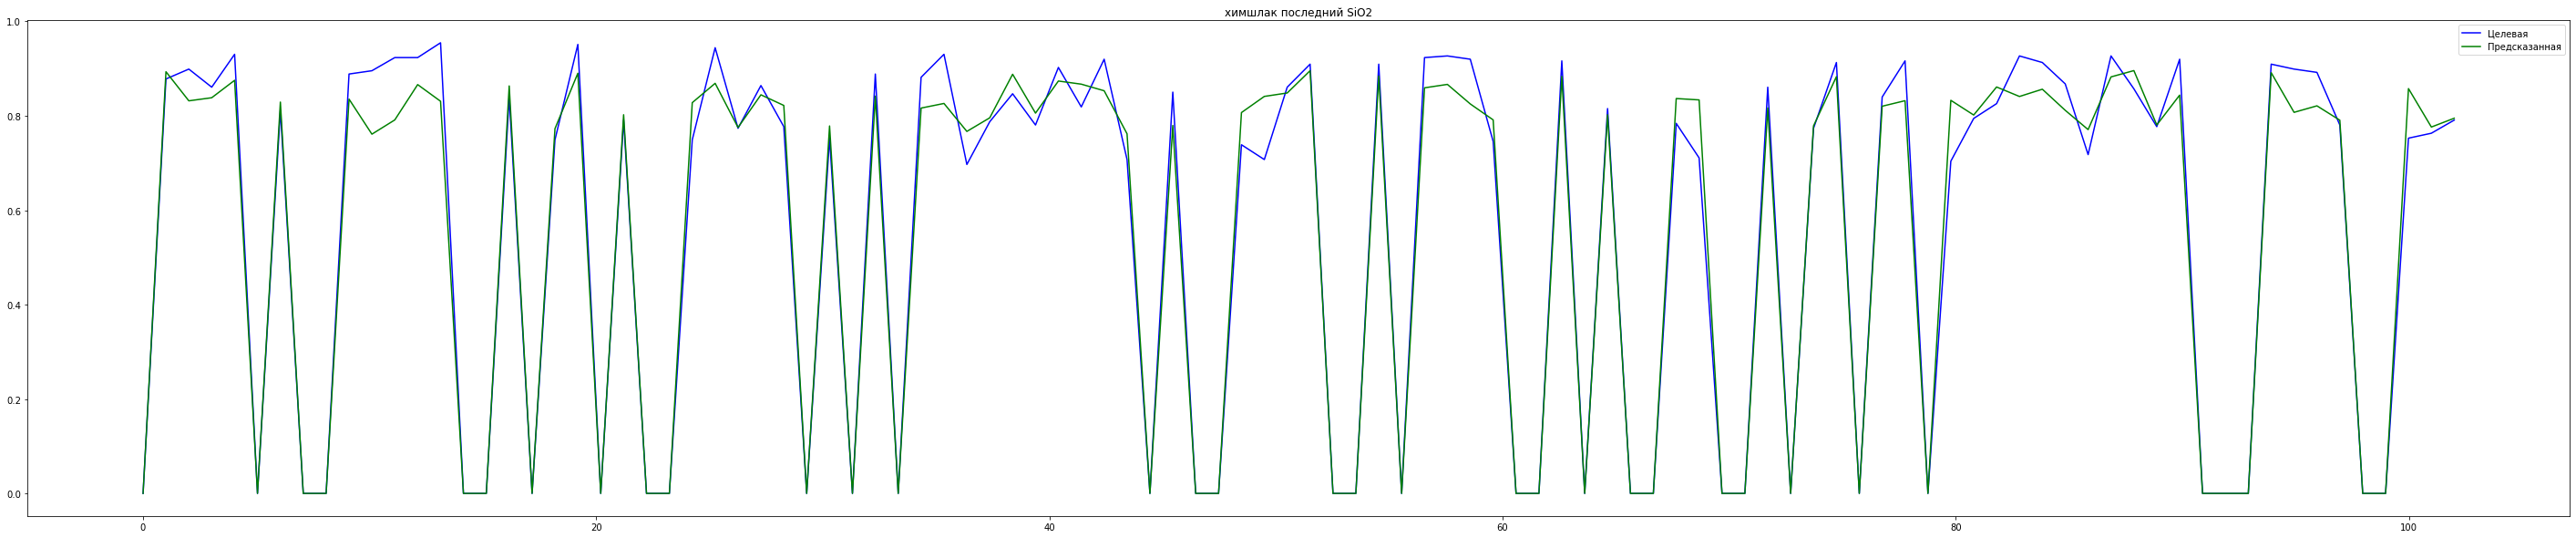

In [7]:
from subfunc import show_result

show_result(pred, y_test)



